In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from pylab import bone, pcolor, colorbar, plot, show

In [50]:
dataset=pd.read_csv('Credit_Card_Applications.csv')
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [51]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [52]:
X.shape,y.shape

((690, 15), (690,))

In [53]:
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [54]:
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [55]:
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

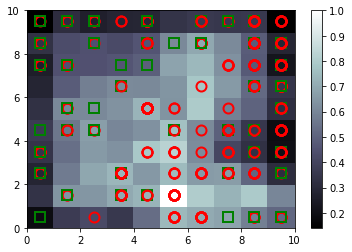

In [56]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [57]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(5,2)], mappings[(6,2)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [60]:
frauds

array([[1.5711742e+07, 0.0000000e+00, 2.3000000e+01, 1.8350000e+00,
        2.0000000e+00, 5.0000000e+00, 3.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 2.0000000e+02, 5.4000000e+01],
       [1.5770995e+07, 0.0000000e+00, 4.0330000e+01, 8.1250000e+00,
        1.0000000e+00, 4.0000000e+00, 4.0000000e+00, 1.6500000e-01,
        0.0000000e+00, 1.0000000e+00, 2.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.8400000e+02, 1.9000000e+01],
       [1.5766734e+07, 0.0000000e+00, 2.7170000e+01, 1.2500000e+00,
        2.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 9.2000000e+01, 3.0100000e+02],
       [1.5665087e+07, 0.0000000e+00, 1.8250000e+01, 1.0000000e+01,
        2.0000000e+00, 9.0000000e+00, 4.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00,

In [61]:
#Building hybrid model

In [62]:
customers = dataset.iloc[:, 1:].values

In [65]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_fraud[i] = 1

In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [68]:
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))

classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

C:\Users\Sachin\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


In [69]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 2)

Epoch 1/2
690/690 [==============================] - 3s 5ms/step - loss: 0.4487 - acc: 0.9812
Epoch 2/2
690/690 [==============================] - 1s 2ms/step - loss: 0.1905 - acc: 0.9812


In [70]:
y_pred = classifier.predict(customers)

In [72]:
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)

In [74]:
y_pred = y_pred[y_pred[:, 1].argsort()]

In [75]:
y_pred

array([[1.57882150e+07, 1.11375786e-02],
       [1.57000460e+07, 1.15629658e-02],
       [1.56531470e+07, 1.19239856e-02],
       ...,
       [1.56461900e+07, 3.15149307e-01],
       [1.57778930e+07, 3.15149307e-01],
       [1.55898810e+07, 3.15149307e-01]])